# BLUE ORIGIN NEW SHEPARD

## Описание математической модели

### №2. Расчет траектории полета ракеты

In [1]:
# %pip install matplotlib
# %pip install pvlib
# %pip install skipy

In [2]:
# Модули
import math
import numpy as np
import matplotlib.pyplot as plt
from pvlib.atmosphere import alt2pres

Характеристики двигателя BE-3:

In [3]:
# Тяга (в Н)
start_thrust = 490 * 1000

# Диаметр ракеты (в метрах)
midel_diameter = 3.7

# Площадь сечени яракеты
midel_area = math.pi * (midel_diameter / 2) ** 2

# Давление в камере сгорания
pressure = 13.4 * 100000

# Диаметр критического сечения сопла (в метрах)
nozzle_section_diameter = 0.379

# Площадь критического сечения сопла (в метр^2)
nozzle_section_area = math.pi * (nozzle_section_diameter / 2) ** 2

# Начальная масса летательного аппарата (полезная нагрузка + конструкция аппарата + топливо) в кг
start_rocket_mass = 75000

# Конечная масса летательного аппарата
end_rocket_mass = 24000

# Температура продуктов сгорания (в Кельвинах)
fuel_combustion_temperature = 3588


Дополнительные константы:

In [4]:
# Ускорение свободного падения
g = 9.8

# Газовая постоянная
R = 8.31

# Показатель адиабаты жидкого водорода (топливо двигателя)
k = 1.4

Подсчет давления атмосферы на указанной высоте:

In [5]:
def calculate_atmosphere_pressure_at_attitude(height: float):
    return alt2pres(height)

Подсчет плотности атмосферы на высоте:

In [6]:
def calculate_atmosphere_density_at_attitude(height: float):
    p_0 = 1.29
    z = 1.25e-4
    return p_0 * math.exp(-height * z)

Подсчет секундного расхода топлива:

In [7]:
def calculate_fuel_consumption(k: float, pressure: float, section_area: float, temperature: float):
    a_k = math.sqrt(k) * (2 / (k + 1)) ** ((k + 1)/(2 * (k - 1)))
    return (a_k * pressure * section_area) / math.sqrt(R * temperature)

Подсчет текущей тяги двигателя

In [8]:
def calculate_current_thrust(atmosphere_pressure: float, start_thrust: float, section_area: float):
    return start_thrust - section_area * atmosphere_pressure

Подсчет силы лобового сопротивления:

In [9]:
def calculate_drag_force(atmosphere_density: float, speed: float, midel_area: float):
    c_x_coef = 0.8
    return c_x_coef * (atmosphere_density * (speed ** 2)) / 2 * midel_area

Подсчет высоты полета:

In [17]:
# Начальная скорость полета ракеты
speed = 0

# Начальная высота ракеты
height = 0

# Текущая масса ракеты
current_rocket_mass = start_rocket_mass

# Расход топлива ракеты
fuel_consumption = calculate_fuel_consumption(k, pressure, nozzle_section_area, fuel_combustion_temperature)

# Время полета ракеты
dt = 1
theoretical_time = list(range(0, 200, dt))

# Список высот полет ракеты
theoretical_height = [height]

for time in theoretical_time:

    if speed > 0:
        break

    # Расчет плотности и давления атмосферы
    atmosphere_density = calculate_atmosphere_density_at_attitude(height)
    atmosphere_pressure = calculate_atmosphere_pressure_at_attitude(height)

    # Расчет текущей массы ракеты
    current_rocket_mass = start_rocket_mass - fuel_consumption * time
    
    # Расчет текущей тяги двигателя
    current_thrust = calculate_current_thrust(atmosphere_pressure, start_thrust, nozzle_section_area)

    # Расчет текущей силы лобового сопротивления
    current_drag_force = calculate_drag_force(atmosphere_density, speed, midel_area)

    # Расчет высоты
    dv = (current_drag_force - current_thrust - current_rocket_mass * g) / current_rocket_mass * dt

   # Расчет новой скорости
    previous_speed = speed
    speed = previous_speed + dv

    # Расчет высоты полета
    height = height + previous_speed * dt
    theoretical_height.append(-5*height)


Результаты миссии в KSP:

In [18]:
experimental_height = list(range(0, 100000, 2000))
experimental_time = [
    0,   30,  40,  48,  54,  60,  64,  68,  72,  76,
    79,  82,  84,  87,  90,  92,  94,  96,  98,  100,
    102, 104, 105, 107, 109, 110, 111, 113, 115, 117,
    119, 120, 121, 123, 124, 125, 126, 127, 128, 129,
    130, 131, 132, 133, 134, 135, 135, 136, 138, 140]

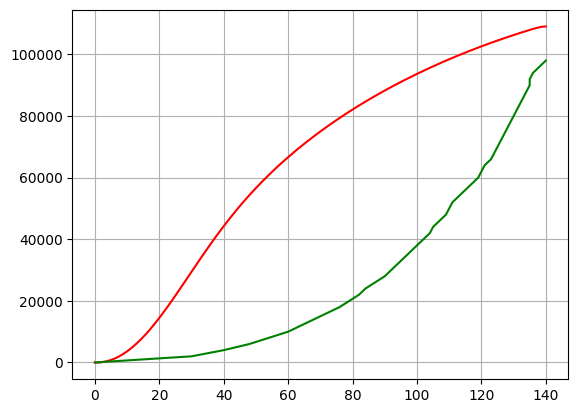

In [19]:
# fig, (plt1, plt2) = plt.subplots(2, figsize=(10, 10))

plt.plot(range(len(theoretical_height)), [height for height in theoretical_height], color="red")
plt.plot(experimental_time, experimental_height, color="green")

# plt.set_xticks(np.arange(0, 150, 10))
# plt.set_yticks(np.arange(0, 101000, 10000))
plt.grid(True)


# plt2.plot(experimental_time, experimental_height, color="green")
# plt2.set_xticks(np.arange(0, 150, 10))
# plt2.set_yticks(np.arange(0, 101000, 10000))
# plt2.grid(True)

plt.show()